In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import pylab
import pandas as pd
import pathlib
plt.style.use('fivethirtyeight')
from utils import plotUtils
import datetime as dt
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy.stats import norm
import statistics

In [11]:
fname_gas = pathlib.Path().resolve() / "data" / "FuturosGasNatural.csv"
fname_petroleo_brent = pathlib.Path().resolve() / "data" / "FuturosPetroleoBrent.csv"
fname_carbon = pathlib.Path().resolve() / "data" / "FuturosNewcastleCarbon.csv"
gas = pd.read_csv(fname_gas, decimal=',')
petroleo_brent = pd.read_csv(fname_petroleo_brent, decimal=',')
carbon = pd.read_csv(fname_carbon, decimal=',')
carbon

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,13.04.2022,312.00,312.00,312.00,312.00,"0,04K","0,94%"
1,12.04.2022,309.10,300.00,303.50,300.00,"0,06K","6,35%"
2,11.04.2022,290.65,292.00,292.00,292.00,"0,04K","-0,33%"
3,08.04.2022,291.60,291.60,291.60,291.60,"0,04K","3,53%"
4,07.04.2022,281.65,296.00,296.00,285.00,"0,10K","0,23%"
...,...,...,...,...,...,...,...
3412,12.12.2008,74.04,74.04,74.04,74.04,"0,01K","-2,42%"
3413,11.12.2008,75.88,75.88,75.88,75.88,"0,02K","6,77%"
3414,10.12.2008,71.07,71.07,71.07,71.07,"0,02K","0,81%"
3415,09.12.2008,70.50,70.50,70.50,70.50,-,"0,07%"


# Varias figuras en la misma

In [5]:
def compoundReturn(dataFrame):
    array = np.empty(dataFrame.size)
    for i in dataFrame.index:
        array[i] = 100 * np.log(dataFrame[i+1] / dataFrame[i])
        if (i + 1 == dataFrame.size - 1):
            break
    return array[::-1]

In [6]:
# 3 es el último
last_price_day_gas = gas["Último"][np.logical_not(np.isnan(gas["Último"]))]
gas_return = compoundReturn(last_price_day_gas)
gas_return

array([ 0.        ,  2.267554  , -2.15283854, ..., -4.28109654,
       -0.76775809,  3.19337521])

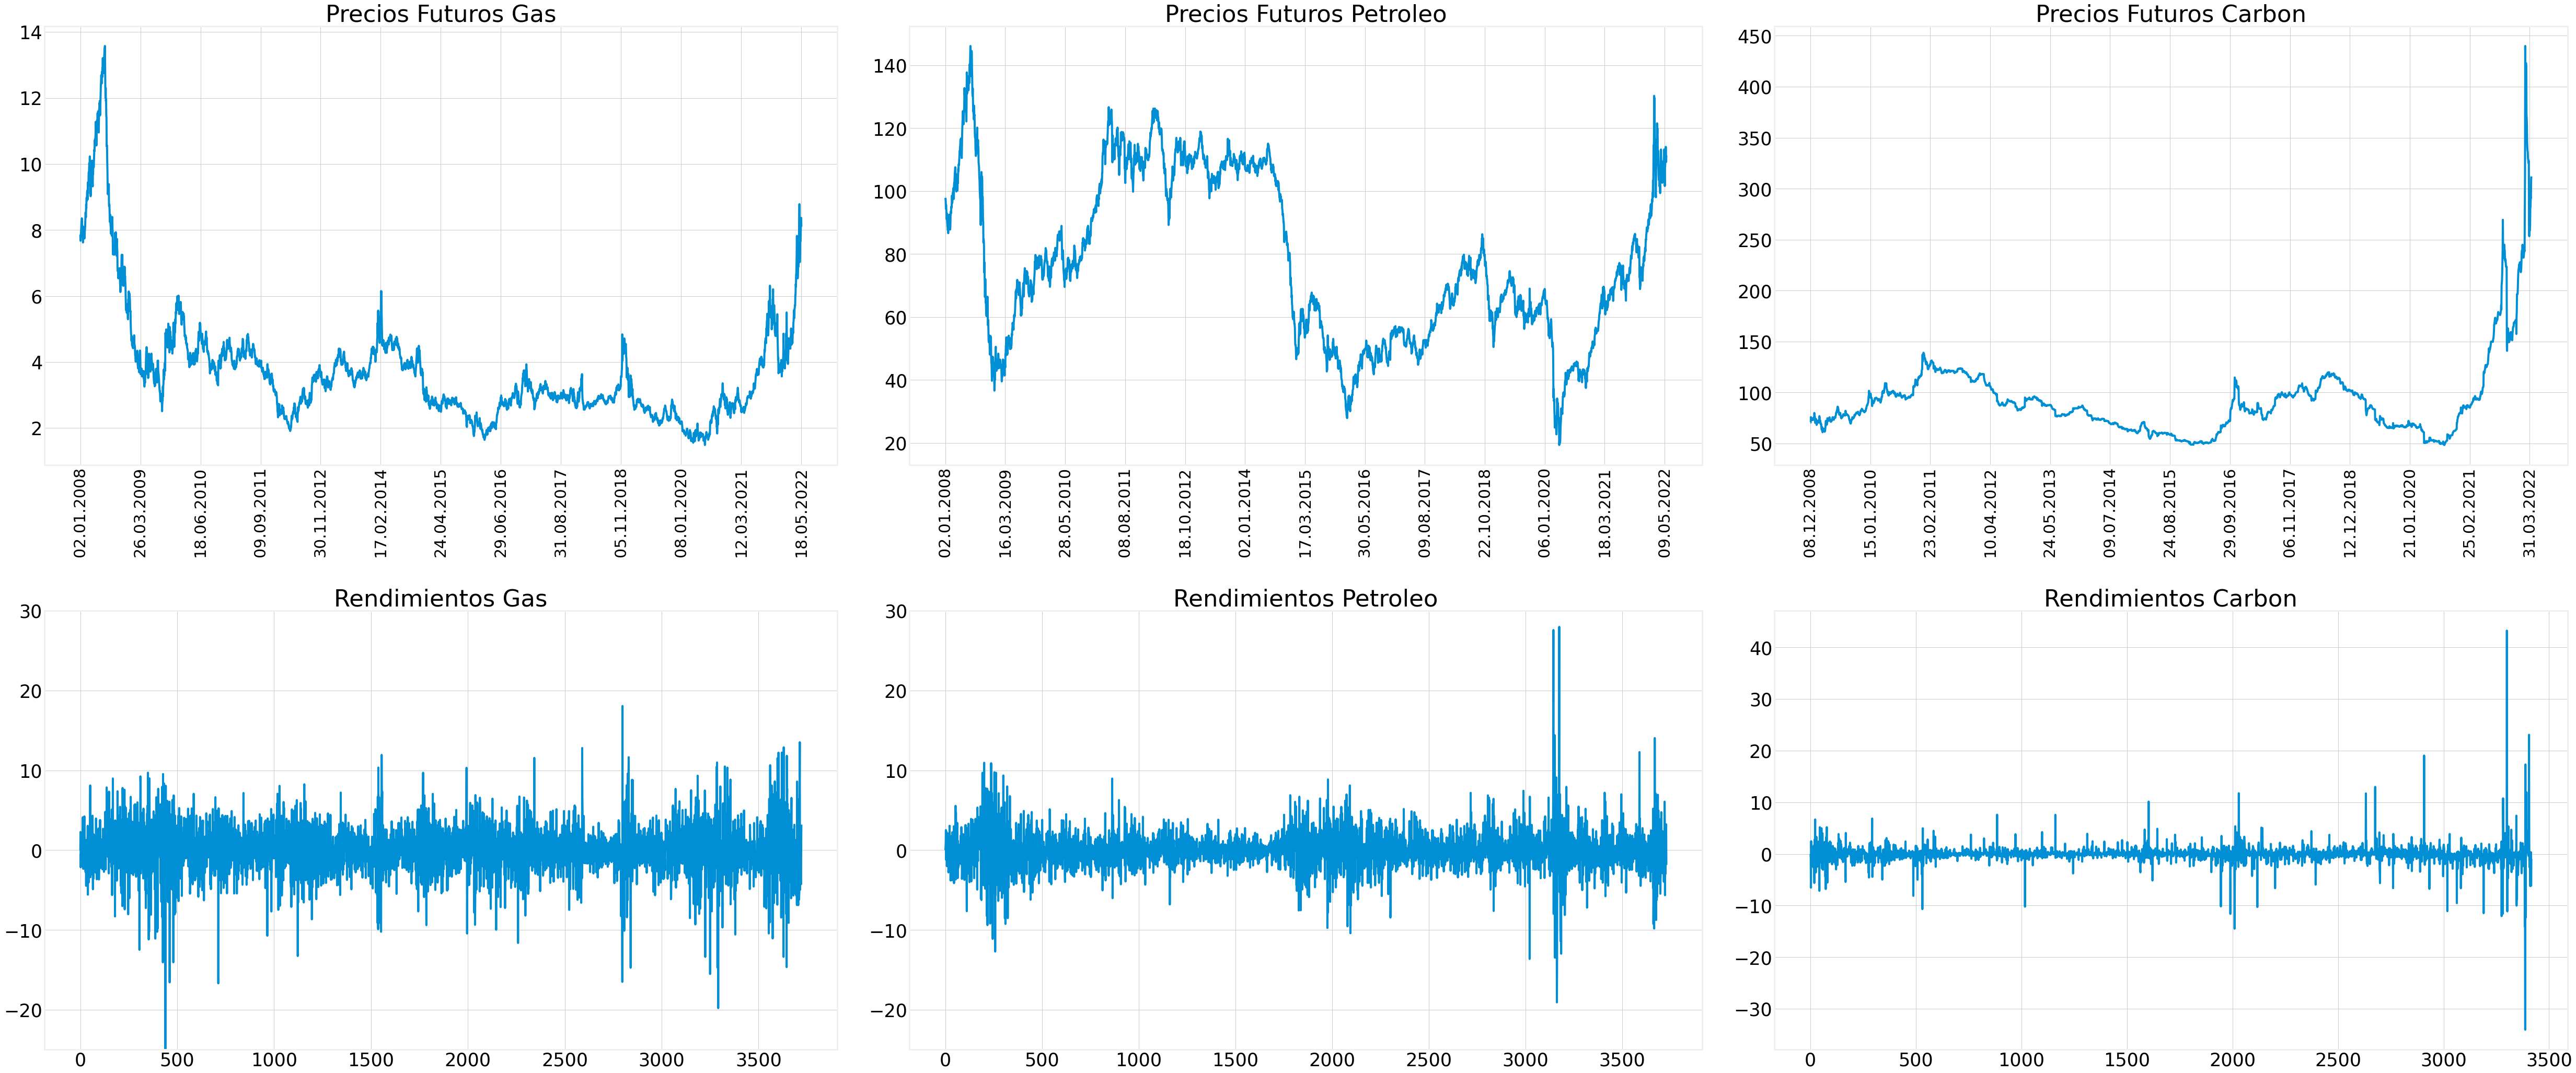

In [20]:
fig, ax = plt.subplots(figsize = (70, 30), nrows=2, ncols=3)

# GAS ######################################################
dates = gas["Fecha"][::-1]
last_price_day_gas = gas["Último"][np.logical_not(np.isnan(gas["Último"]))]
gas_return = compoundReturn(last_price_day_gas)
# Historical
ax[0,0].plot(dates, last_price_day_gas[::-1])
ax[0,0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,0].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,0].set_xticks(np.arange(0, len(dates),310, dtype=float))
ax[0,0].set_title('Precios Futuros Gas', fontsize = 45)
ax[0,0].tick_params(axis='y', labelsize=35)
ax[0,0].set_facecolor('w')
# Compound Return 
ax[1,0].set_ylim([-25, 30])
ax[1,0].plot(np.arange(0, len(gas_return)), gas_return)
ax[1,0].set_title('Rendimientos Gas', fontsize = 45)
ax[1,0].tick_params(axis='both', labelsize=35)
ax[1,0].set_facecolor('w')
# # Petroleo #################################################
dates = petroleo_brent["Fecha"][::-1]
last_price_day_petroleo = petroleo_brent["Último"][np.logical_not(np.isnan(petroleo_brent["Último"]))]
petroleo_return = compoundReturn(last_price_day_petroleo)
# Historical
ax[0,1].plot(dates, last_price_day_petroleo[::-1])
ax[0,1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,1].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,1].set_xticks(np.arange(0, len(dates),310, dtype=float))
ax[0,1].set_title('Precios Futuros Petroleo', fontsize = 45)
ax[0,1].tick_params(axis='y', labelsize=35)
ax[0,1].set_facecolor('w')
# Compound Return 
ax[1,1].set_ylim([-25, 30])
ax[1,1].plot(np.arange(0, len(petroleo_return)), petroleo_return)
ax[1,1].set_title('Rendimientos Petroleo', fontsize = 45)
ax[1,1].tick_params(axis='both', labelsize=35)
ax[1,1].set_facecolor('w')
# # Carbon ###################################################
dates = carbon["Fecha"][::-1]
last_price_day_carbon = carbon["Último"][np.logical_not(np.isnan(carbon["Último"]))]
carbon_return = compoundReturn(last_price_day_carbon)
# Historical
ax[0,2].plot(dates, last_price_day_carbon[::-1])
ax[0,2].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,2].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,2].set_xticks(np.arange(0, len(dates),284, dtype=float))
ax[0,2].set_title('Precios Futuros Carbon', fontsize = 45)
ax[0,2].tick_params(axis='y', labelsize=35)
ax[0,2].set_facecolor('w')
# Compound Return 
# ax[1,2].set_ylim([-25, 35])
ax[1,2].plot(np.arange(0, len(carbon_return)), carbon_return)
ax[1,2].set_title('Rendimientos Carbon', fontsize = 45)
ax[1,2].tick_params(axis='both', labelsize=35)
ax[1,2].set_facecolor('w')

fig.tight_layout(pad=6)

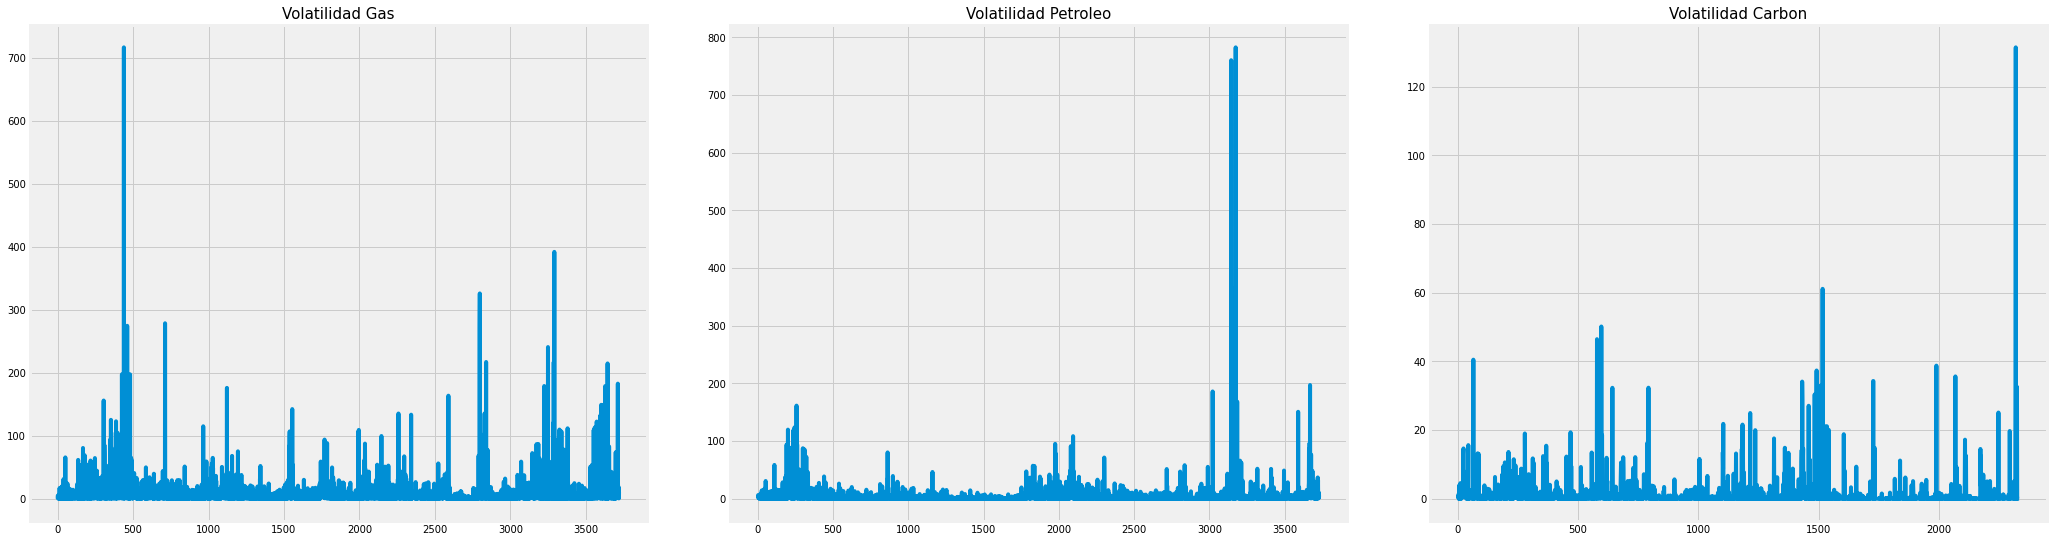

In [6]:
fig, ax = plt.subplots(figsize = (30, 9), nrows=1, ncols=3)

# GAS ######################################################
volatilidad = np.square(gas_return)

ax[0].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[0].set_title('Volatilidad Gas', fontsize = 15)
fig.tight_layout(pad=6)

# Petroleo ######################################################
volatilidad = np.square(petroleo_return)

ax[1].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[1].set_title('Volatilidad Petroleo', fontsize = 15)
fig.tight_layout(pad=6)

# Carbon ######################################################
volatilidad = np.square(carbon_return)

ax[2].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[2].set_title('Volatilidad Carbon', fontsize = 15)
fig.tight_layout(pad=6)

Text(0.5, 1.0, 'Correlogram Carbon')

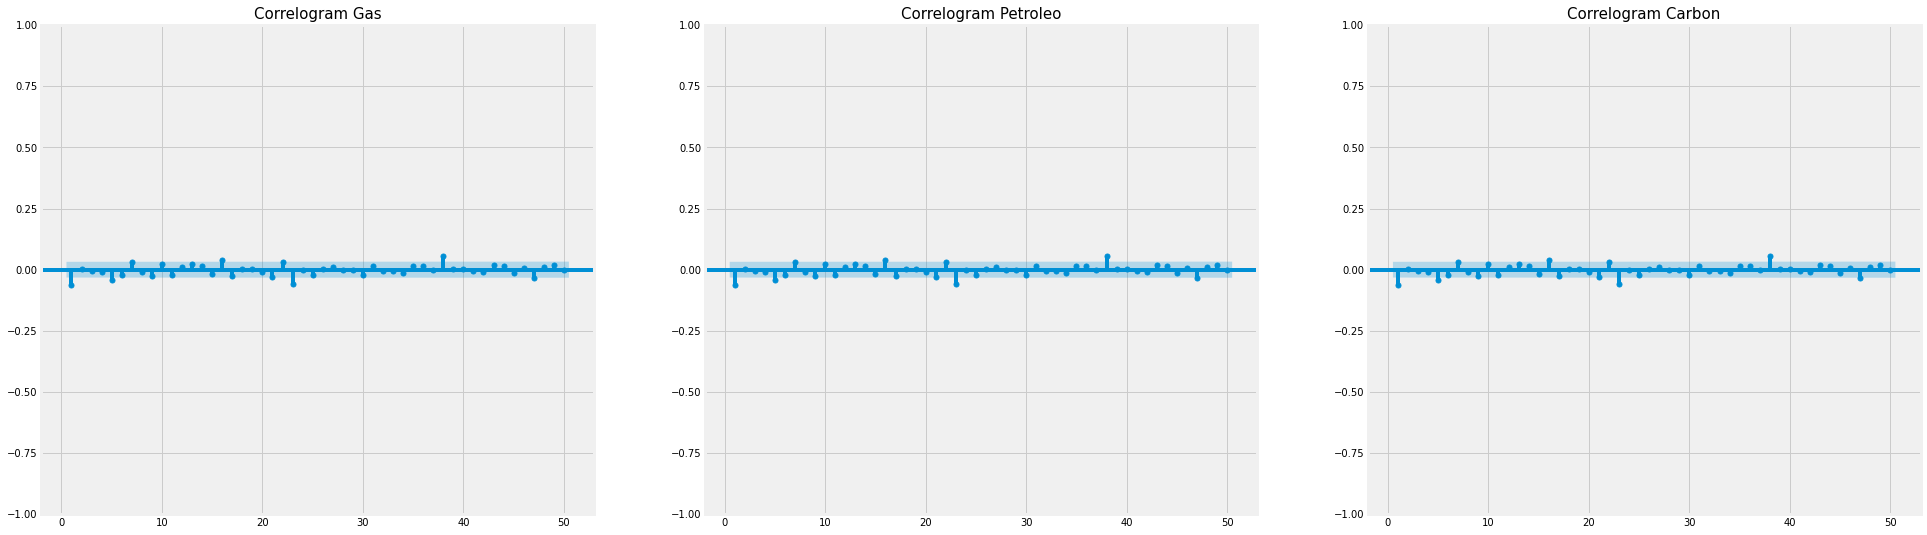

In [7]:
fig, ax = plt.subplots(figsize = (30, 9), nrows=1, ncols=3)

# GAS ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[0])
ax[0].set_title('Correlogram Gas', fontsize = 15)

# PETROLEO ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[1])
ax[1].set_title('Correlogram Petroleo', fontsize = 15)

# CARBON ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[2])
ax[2].set_title('Correlogram Carbon', fontsize = 15)

## Estadistica descriptiva

#### Mean

In [8]:
np.mean(gas_return)

-0.000858882949847435

In [9]:
np.mean(petroleo_return)

-0.0034556505872004096

In [10]:
np.nanmean(carbon_return)

0.03147108541523753

## Mediana

In [11]:
np.median(gas_return)

0.0

In [12]:
np.median(petroleo_return)

-0.07845915880553418

In [13]:
np.median(carbon_return)

0.0

### Desviación Estandar

In [14]:
np.std(gas_return)

3.171770183539338

In [15]:
np.std(petroleo_return)

2.425985472254448

In [16]:
np.std(carbon_return)

1.1781370802812798

# Max and Min

In [17]:
gas_return.max()

18.054517395020035

In [18]:
gas_return.min()

-26.77118707940863

In [19]:
petroleo_return.max()

27.976149608285578

In [20]:
petroleo_return.min()

-19.07740120271406

In [21]:
carbon_return.max()

11.462916955936134

In [22]:
carbon_return.min()

-7.817107525780166

### Swekness

In [23]:
stats.skew(gas_return)

-0.4405577499084189

In [24]:
stats.skew(petroleo_return)

0.6778484810985486

In [25]:
stats.skew(carbon_return)

0.1349774316989279

### kurstosis

In [26]:
stats.kurtosis(gas_return, fisher=False)

7.375483280297577

In [27]:
stats.kurtosis(petroleo_return, fisher=False)

16.771826900305758

In [28]:
stats.kurtosis(carbon_return, fisher=False)

14.158324295220257

## Histogram + BoxPlot

In [29]:
def addNorm(data, ax):
  # Fit a normal distribution to
  # the data:
  # mean and standard deviation
  mu, std = norm.fit(data) 
    
  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  ax.plot(x, p, 'k', linewidth=7, color='r')

/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_50640/1837531769.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')
/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_50640/1837531769.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')
/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_50640/1837531769.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')


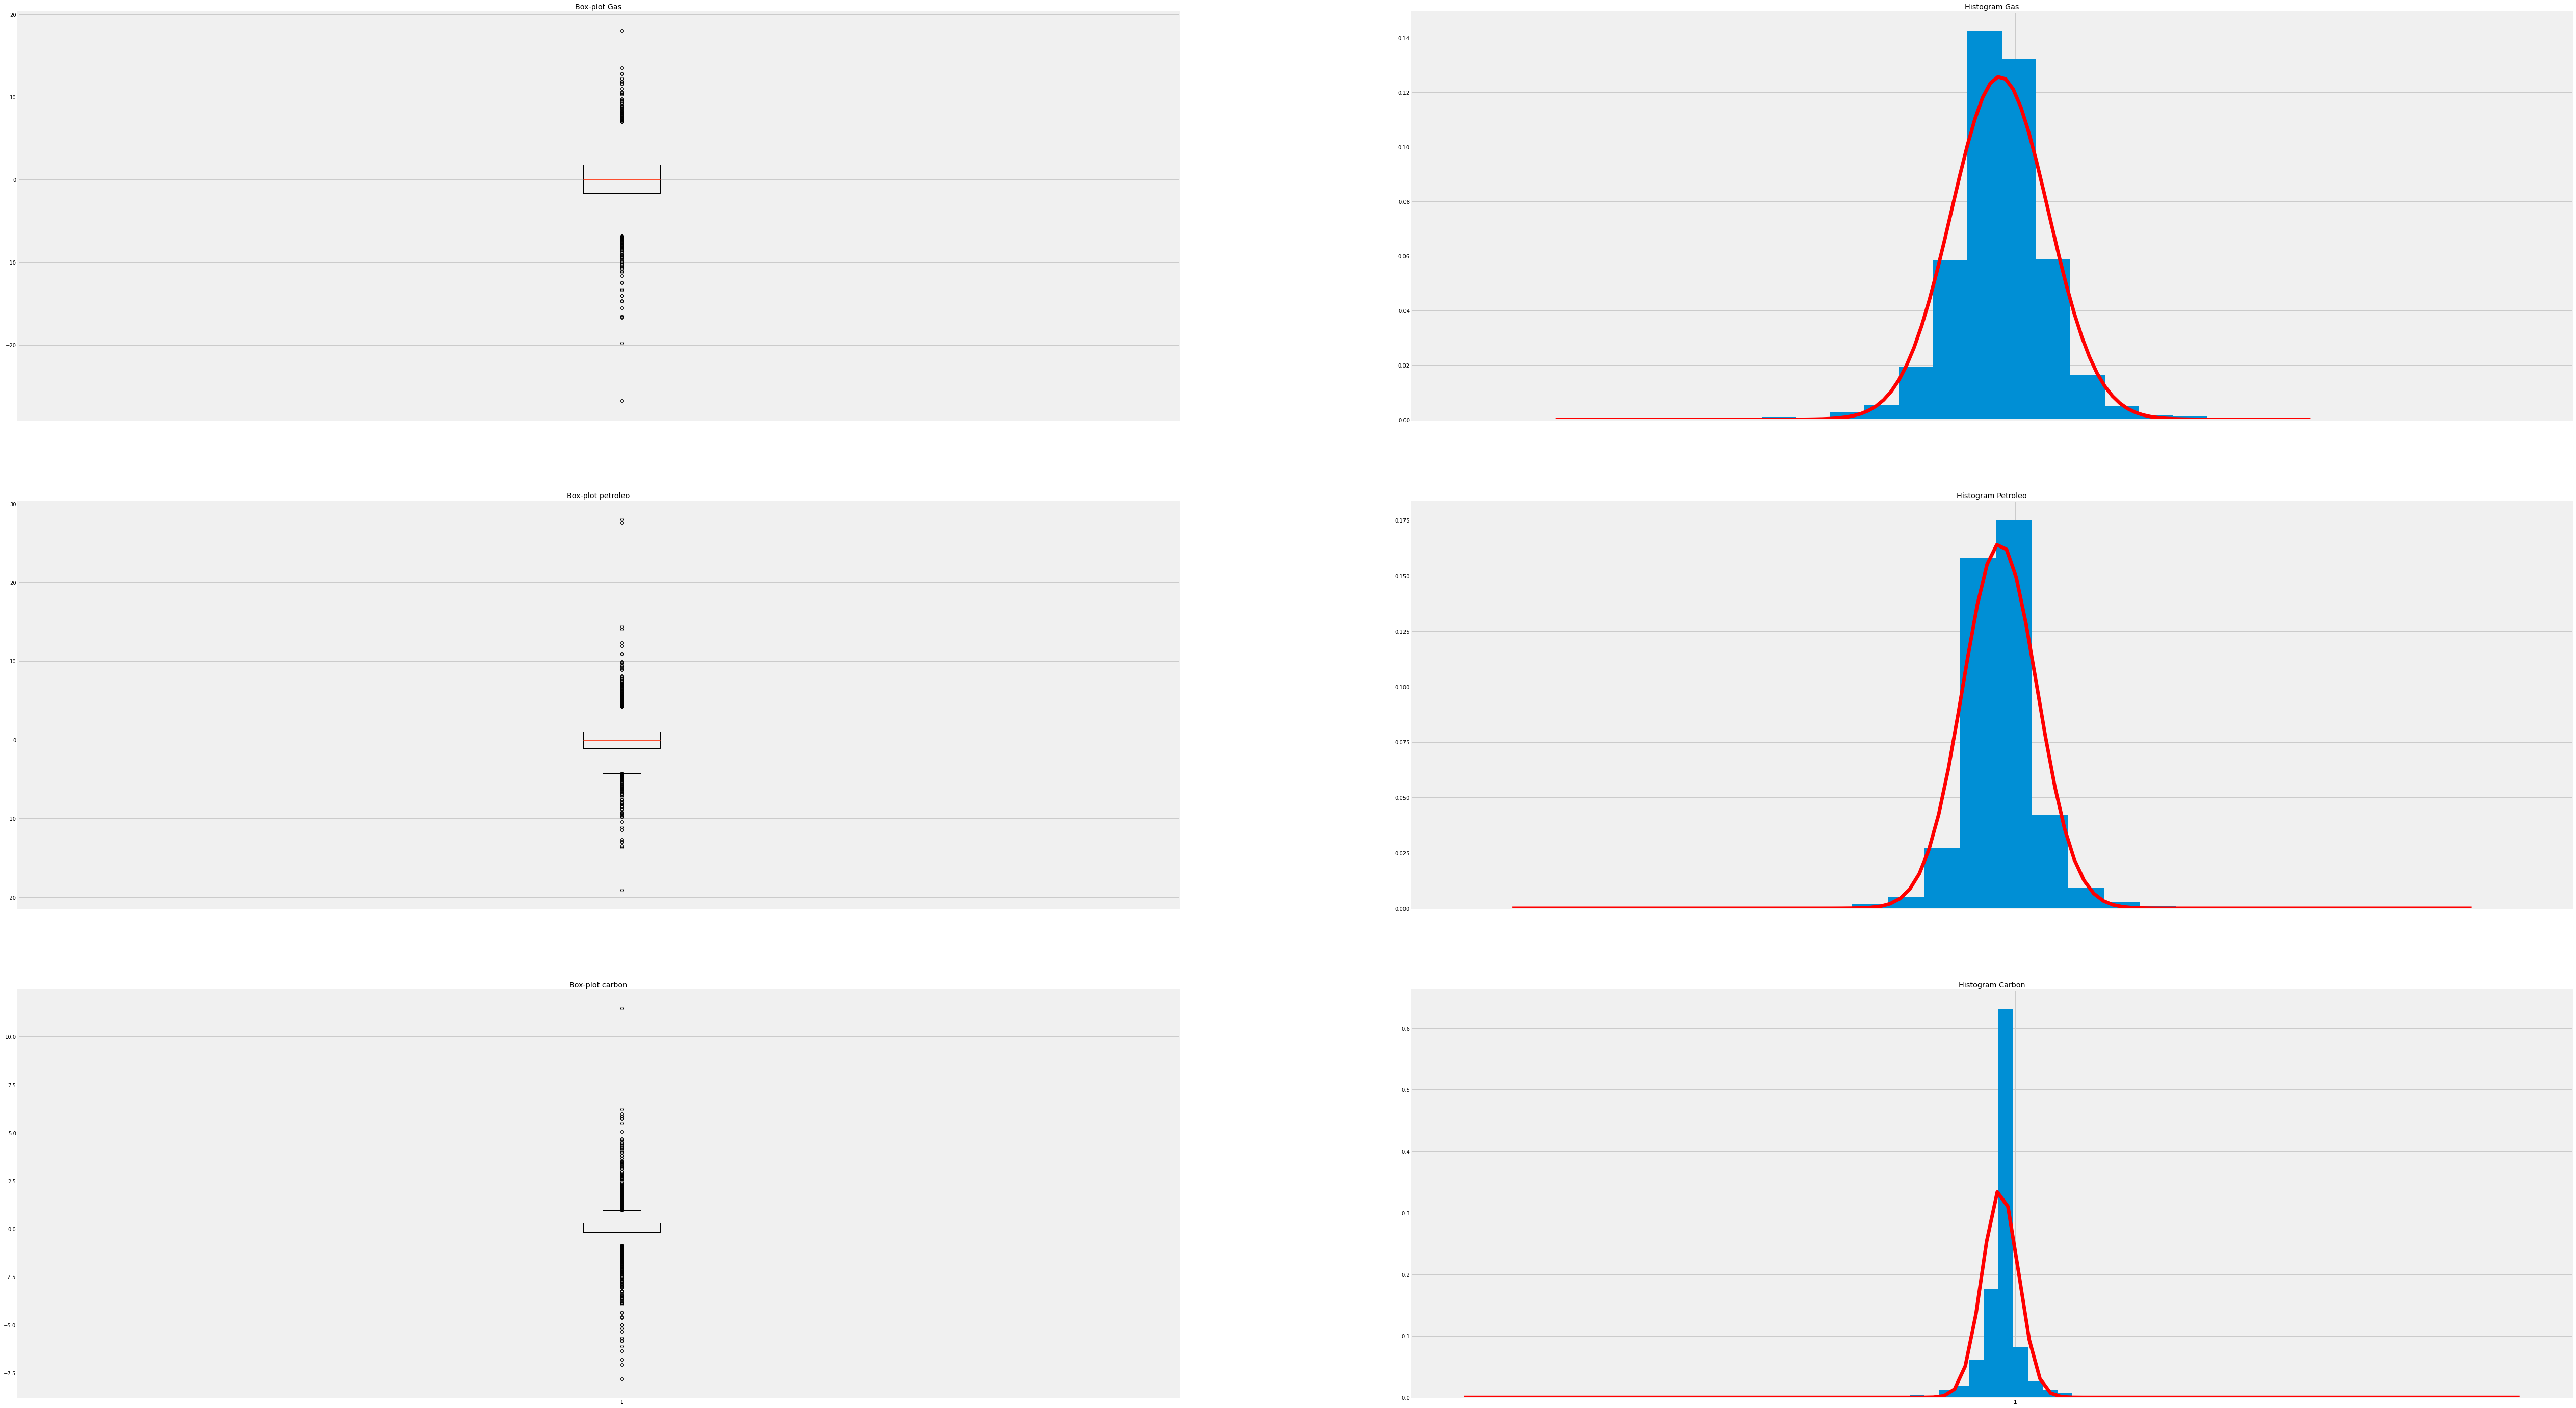

In [30]:
fig, ax = plt.subplots(figsize = (80, 50), nrows=3, ncols=2, sharex=True)

##################### GAS ###########################
# BOX-PLOT
ax[0,0].boxplot(gas_return, widths=5)
ax[0,0].set_title('Box-plot Gas')
# HISTOGRAM
ax[0,1].hist(gas_return, 20, density=1)
ax[0,1].set_title('Histogram Gas')
addNorm(gas_return, ax[0,1])
##################### PETROLEO ###########################
# BOX-PLOT
ax[1,0].boxplot(petroleo_return, widths=5)
ax[1,0].set_title('Box-plot petroleo')
# HISTOGRAM
ax[1,1].hist(petroleo_return, 20, density=1)
ax[1,1].set_title('Histogram Petroleo')
addNorm(petroleo_return, ax[1,1])
##################### CARBON ###########################
# BOX-PLOT
ax[2,0].boxplot(carbon_return, widths=5)
ax[2,0].set_title('Box-plot carbon')
# HISTOGRAM
ax[2,1].hist(carbon_return, 20, density=1)
ax[2,1].set_title('Histogram Carbon')
addNorm(carbon_return, ax[2,1])

# QQ-Plot

((array([-3.43451557, -3.18633264, -3.04883771, ...,  3.04883771,
          3.18633264,  3.43451557]),
  array([-7.81710753, -7.08099715, -6.81528882, ...,  5.96746749,
          6.22482624, 11.46291696])),
 (1.0508378553327837, 0.031471085415237264, 0.8907754545221117))

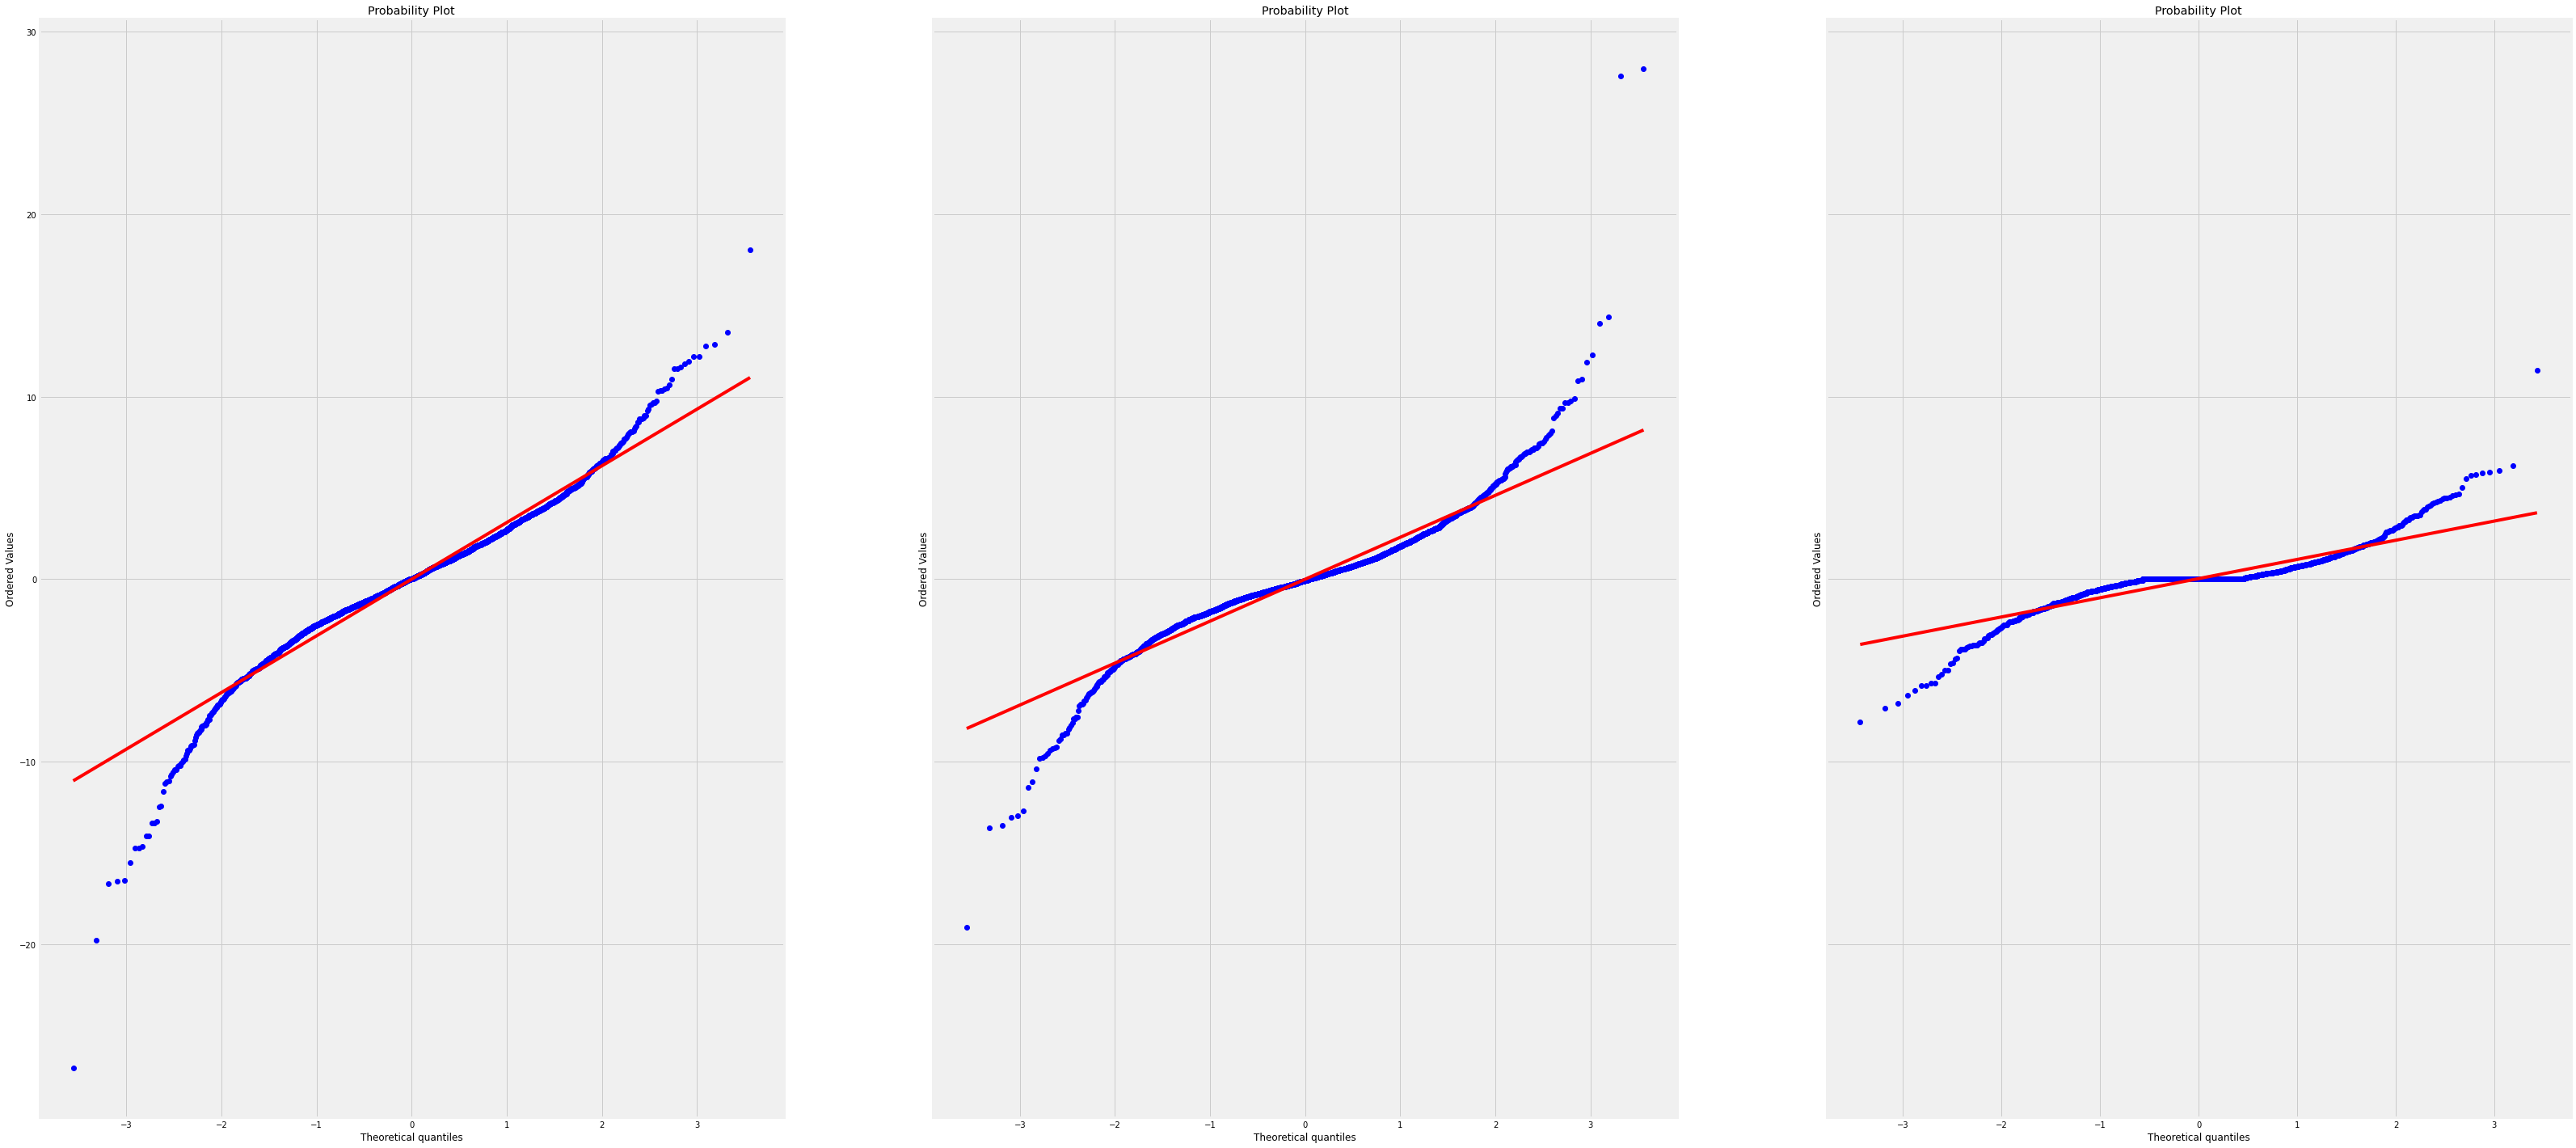

In [31]:
fig, ax = plt.subplots(figsize = (50, 25), nrows=1, ncols=3, sharey=True)

##################### GAS ###########################
# QQ-PLOT
stats.probplot(gas_return, dist="norm", plot=ax[0])
##################### PETROLEO ###########################
# QQ-PLOT
stats.probplot(petroleo_return, dist="norm", plot=ax[1])
##################### CARBON ###########################
# QQ-PLOT
stats.probplot(carbon_return, dist="norm", plot=ax[2])

# Test de nornmalidad

In [32]:
stats.jarque_bera(gas_return)

Jarque_beraResult(statistic=3089.4489628664264, pvalue=0.0)

In [33]:
stats.jarque_bera(petroleo_return)

Jarque_beraResult(statistic=29762.467353597996, pvalue=0.0)

In [34]:
stats.jarque_bera(carbon_return)

Jarque_beraResult(statistic=12120.70058781322, pvalue=0.0)

In [35]:
stats.kstest(gas_return, 'norm')

KstestResult(statistic=0.21576120290327483, pvalue=1.411451367292655e-152)

In [36]:
stats.kstest(petroleo_return, 'norm')

KstestResult(statistic=0.1276150815756843, pvalue=2.0498474460690035e-53)

In [37]:
stats.kstest(carbon_return, 'norm')

KstestResult(statistic=0.2139186295503212, pvalue=2.9436755067980426e-94)

## LJUNG-BOX

In [38]:
acorr_ljungbox(gas_return, lags=[10, 20, 30], return_df=True)

,lb_stat,lb_pvalue
10,31.521114,0.000481
20,47.448968,0.000508
30,71.115659,0.000034


In [39]:
acorr_ljungbox(petroleo_return, lags=[10, 20, 30], return_df=True)

,lb_stat,lb_pvalue
10,15.605396,1.114994e-01
20,52.424830,9.869953e-05
30,82.367384,8.972585e-07


In [40]:
acorr_ljungbox(carbon_return, lags=[10, 20, 30], return_df=True)

,lb_stat,lb_pvalue
10,65.406887,3.387990e-10
20,83.354883,1.050323e-09
30,93.975359,1.619473e-08


# Taylor Effect

In [41]:
def transform(x, exp):
    x = np.absolute(x)
    array = np.empty(len(x))
    for i, value in enumerate(x):
       array[i] = value**exp
    return array

In [42]:
def lagging(x, lag):
    return x[:-(lag+1)], x[lag:-1]

/Users/cesarredondourdiales/Workdir/tfg/python-virtual-environments/env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Text(0.5, 1.0, 'Carbon')

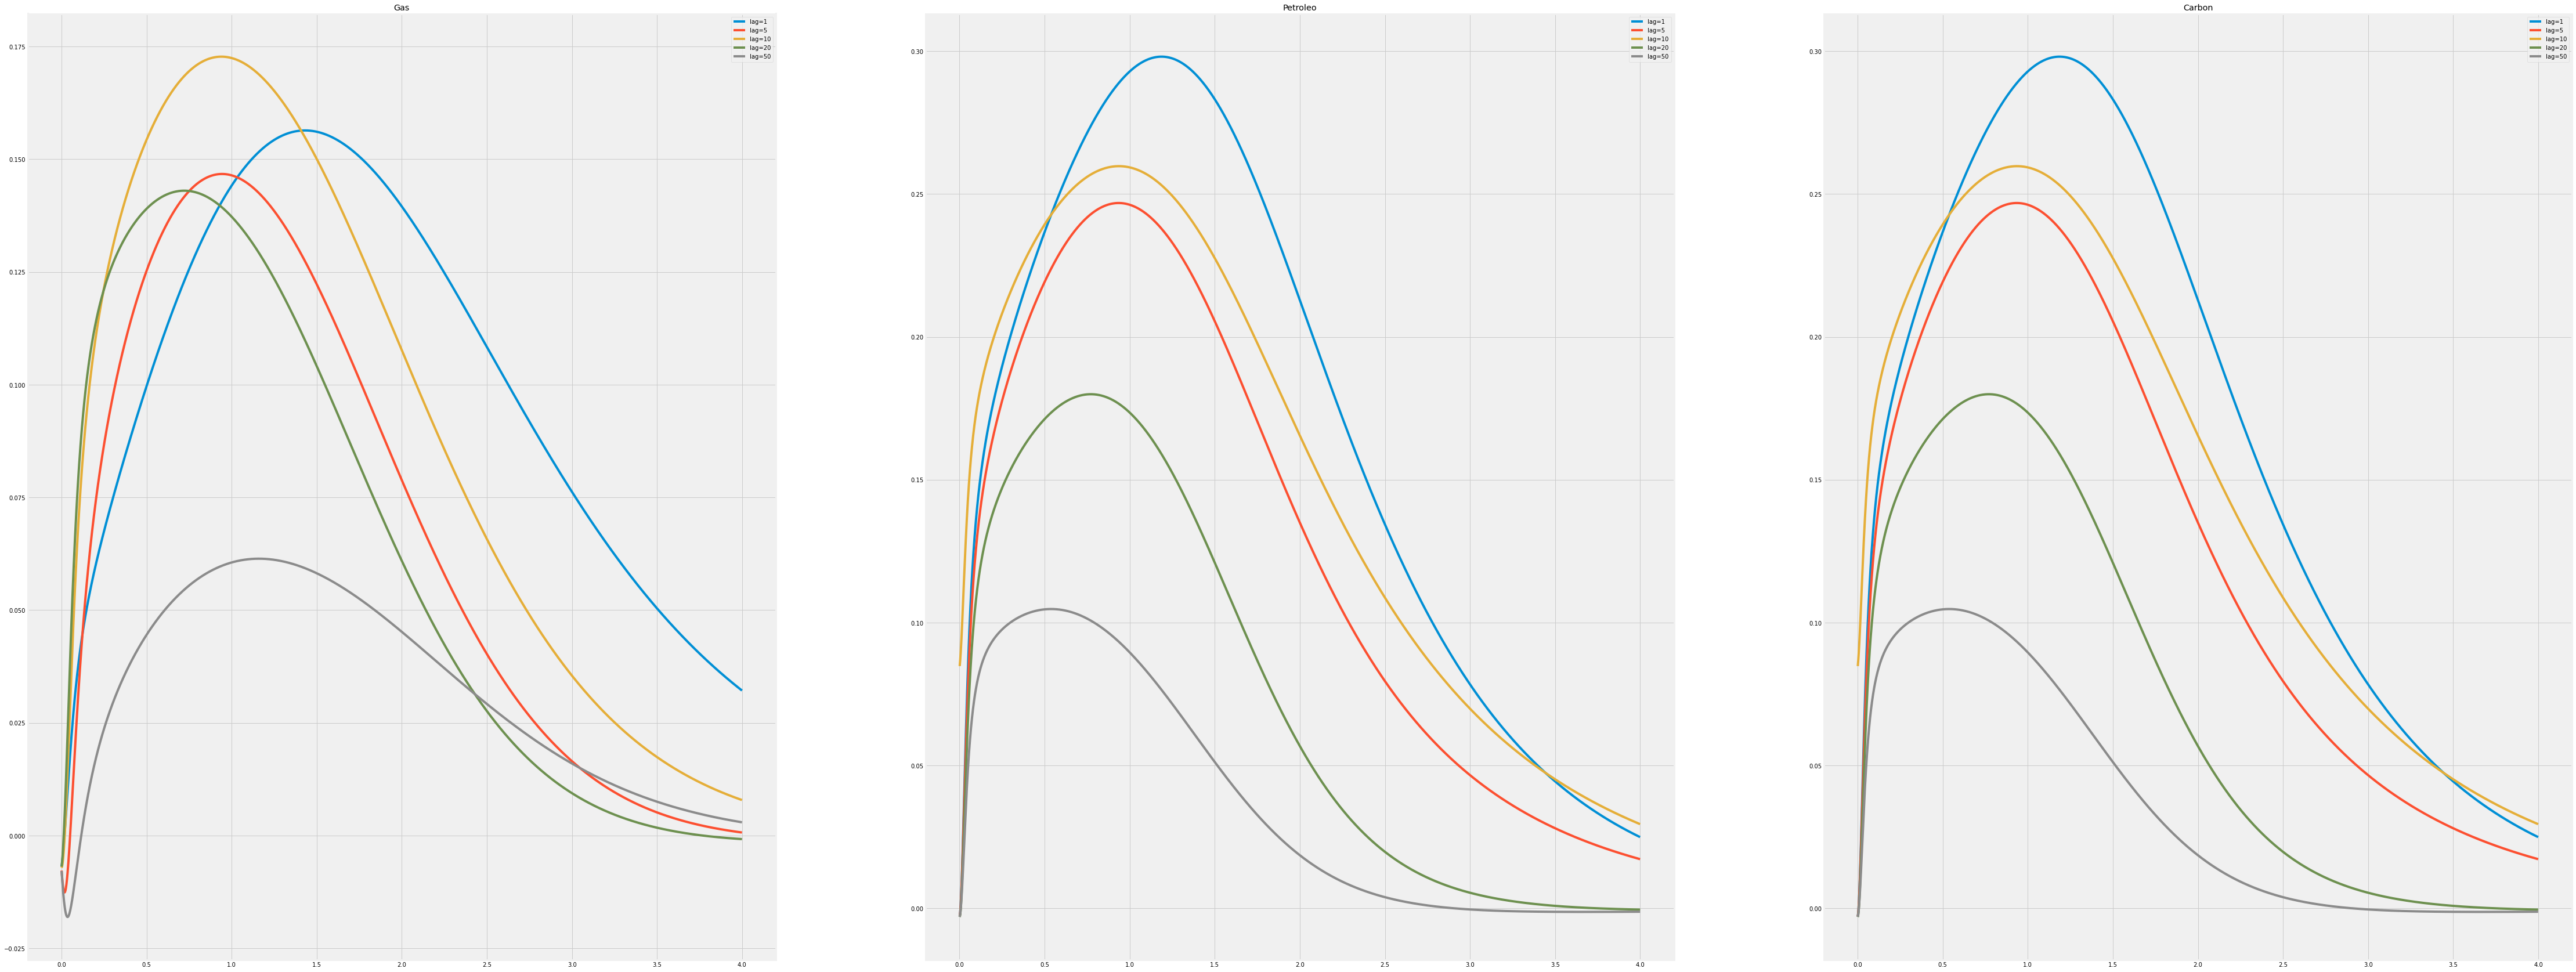

In [43]:
fig, ax = plt.subplots(figsize = (70, 30), nrows=1, ncols=3)

# GAS ######################################################
array = np.empty(4000)
aX = np.arange(4000)/1000
for a in [1, 5, 10, 20, 50]:
    for b in np.arange(0,4000):
        proc = transform(gas_return, b/1000)
        x,y = lagging(proc, a)
        array[b], _ = stats.pearsonr(x, y)
    ax[0].plot(aX, array, label='lag={0}'.format(a))
    ax[0].legend()
ax[0].set_title('Gas')
# PETROLEO ###################################################
array = np.empty(4000)
aX = np.arange(4000)/1000
for a in [1, 5, 10, 20, 50]:
    for b in np.arange(0,4000):
        proc = transform(petroleo_return, b/1000)
        x,y = lagging(proc, a)
        array[b], _ = stats.pearsonr(x, y)
    ax[1].plot(aX, array, label='lag={0}'.format(a))
    ax[1].legend()
ax[1].set_title('Petroleo')
# CARBON #####################################################
array = np.empty(4000)
aX = np.arange(4000)/1000
for a in [1, 5, 10, 20, 50]:
    for b in np.arange(0,4000):
        proc = transform(petroleo_return, b/1000)
        x,y = lagging(proc, a)
        array[b], _ = stats.pearsonr(x, y)
    ax[2].plot(aX, array, label='lag={0}'.format(a))
    ax[2].legend()
ax[2].set_title('Carbon')

Text(0.5, 1.0, 'Correlograma |Carbon|')

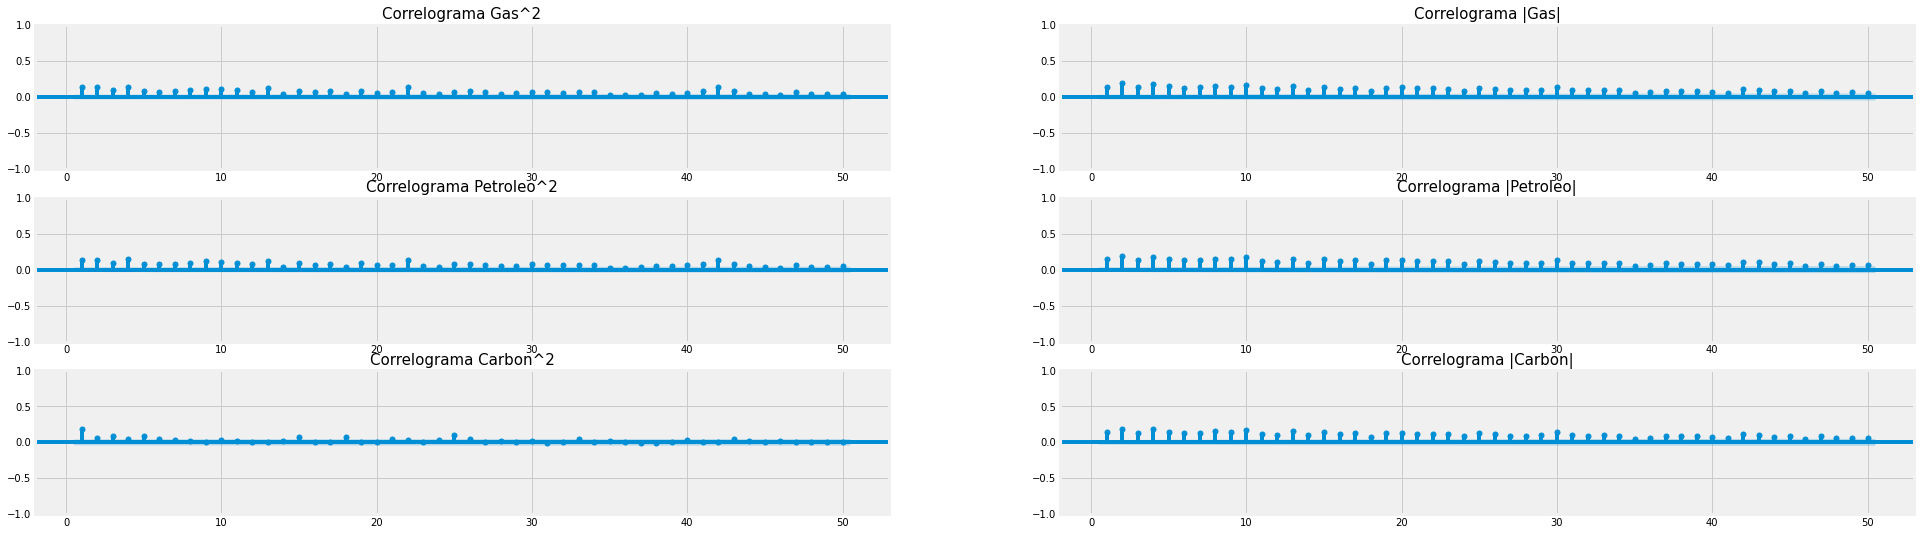

In [44]:
fig, ax = plt.subplots(figsize = (30, 9), nrows=3, ncols=2)

# GAS ######################################################
sm.graphics.tsa.plot_acf(x=np.square(gas_return), lags=50, zero=False, ax=ax[0,0])
ax[0,0].set_title('Correlograma Gas^2', fontsize = 15)
sm.graphics.tsa.plot_acf(x=np.abs(gas_return), lags=50, zero=False, ax=ax[0,1])
ax[0,1].set_title('Correlograma |Gas|', fontsize = 15)
# PETROLEO ######################################################
sm.graphics.tsa.plot_acf(x=np.square(gas_return), lags=50, zero=False, ax=ax[1,0])
ax[1,0].set_title('Correlograma Petroleo^2', fontsize = 15)
sm.graphics.tsa.plot_acf(x=np.abs(gas_return), lags=50, zero=False, ax=ax[1,1])
ax[1,1].set_title('Correlograma |Petroleo|', fontsize = 15)
# CARBON ######################################################
sm.graphics.tsa.plot_acf(x=np.square(carbon_return), lags=50, zero=False, ax=ax[2,0])
ax[2,0].set_title('Correlograma Carbon^2', fontsize = 15)
sm.graphics.tsa.plot_acf(x=np.abs(gas_return), lags=50, zero=False, ax=ax[2,1])
ax[2,1].set_title('Correlograma |Carbon|', fontsize = 15)

# Leverage Effect

(0.0, 50.0)

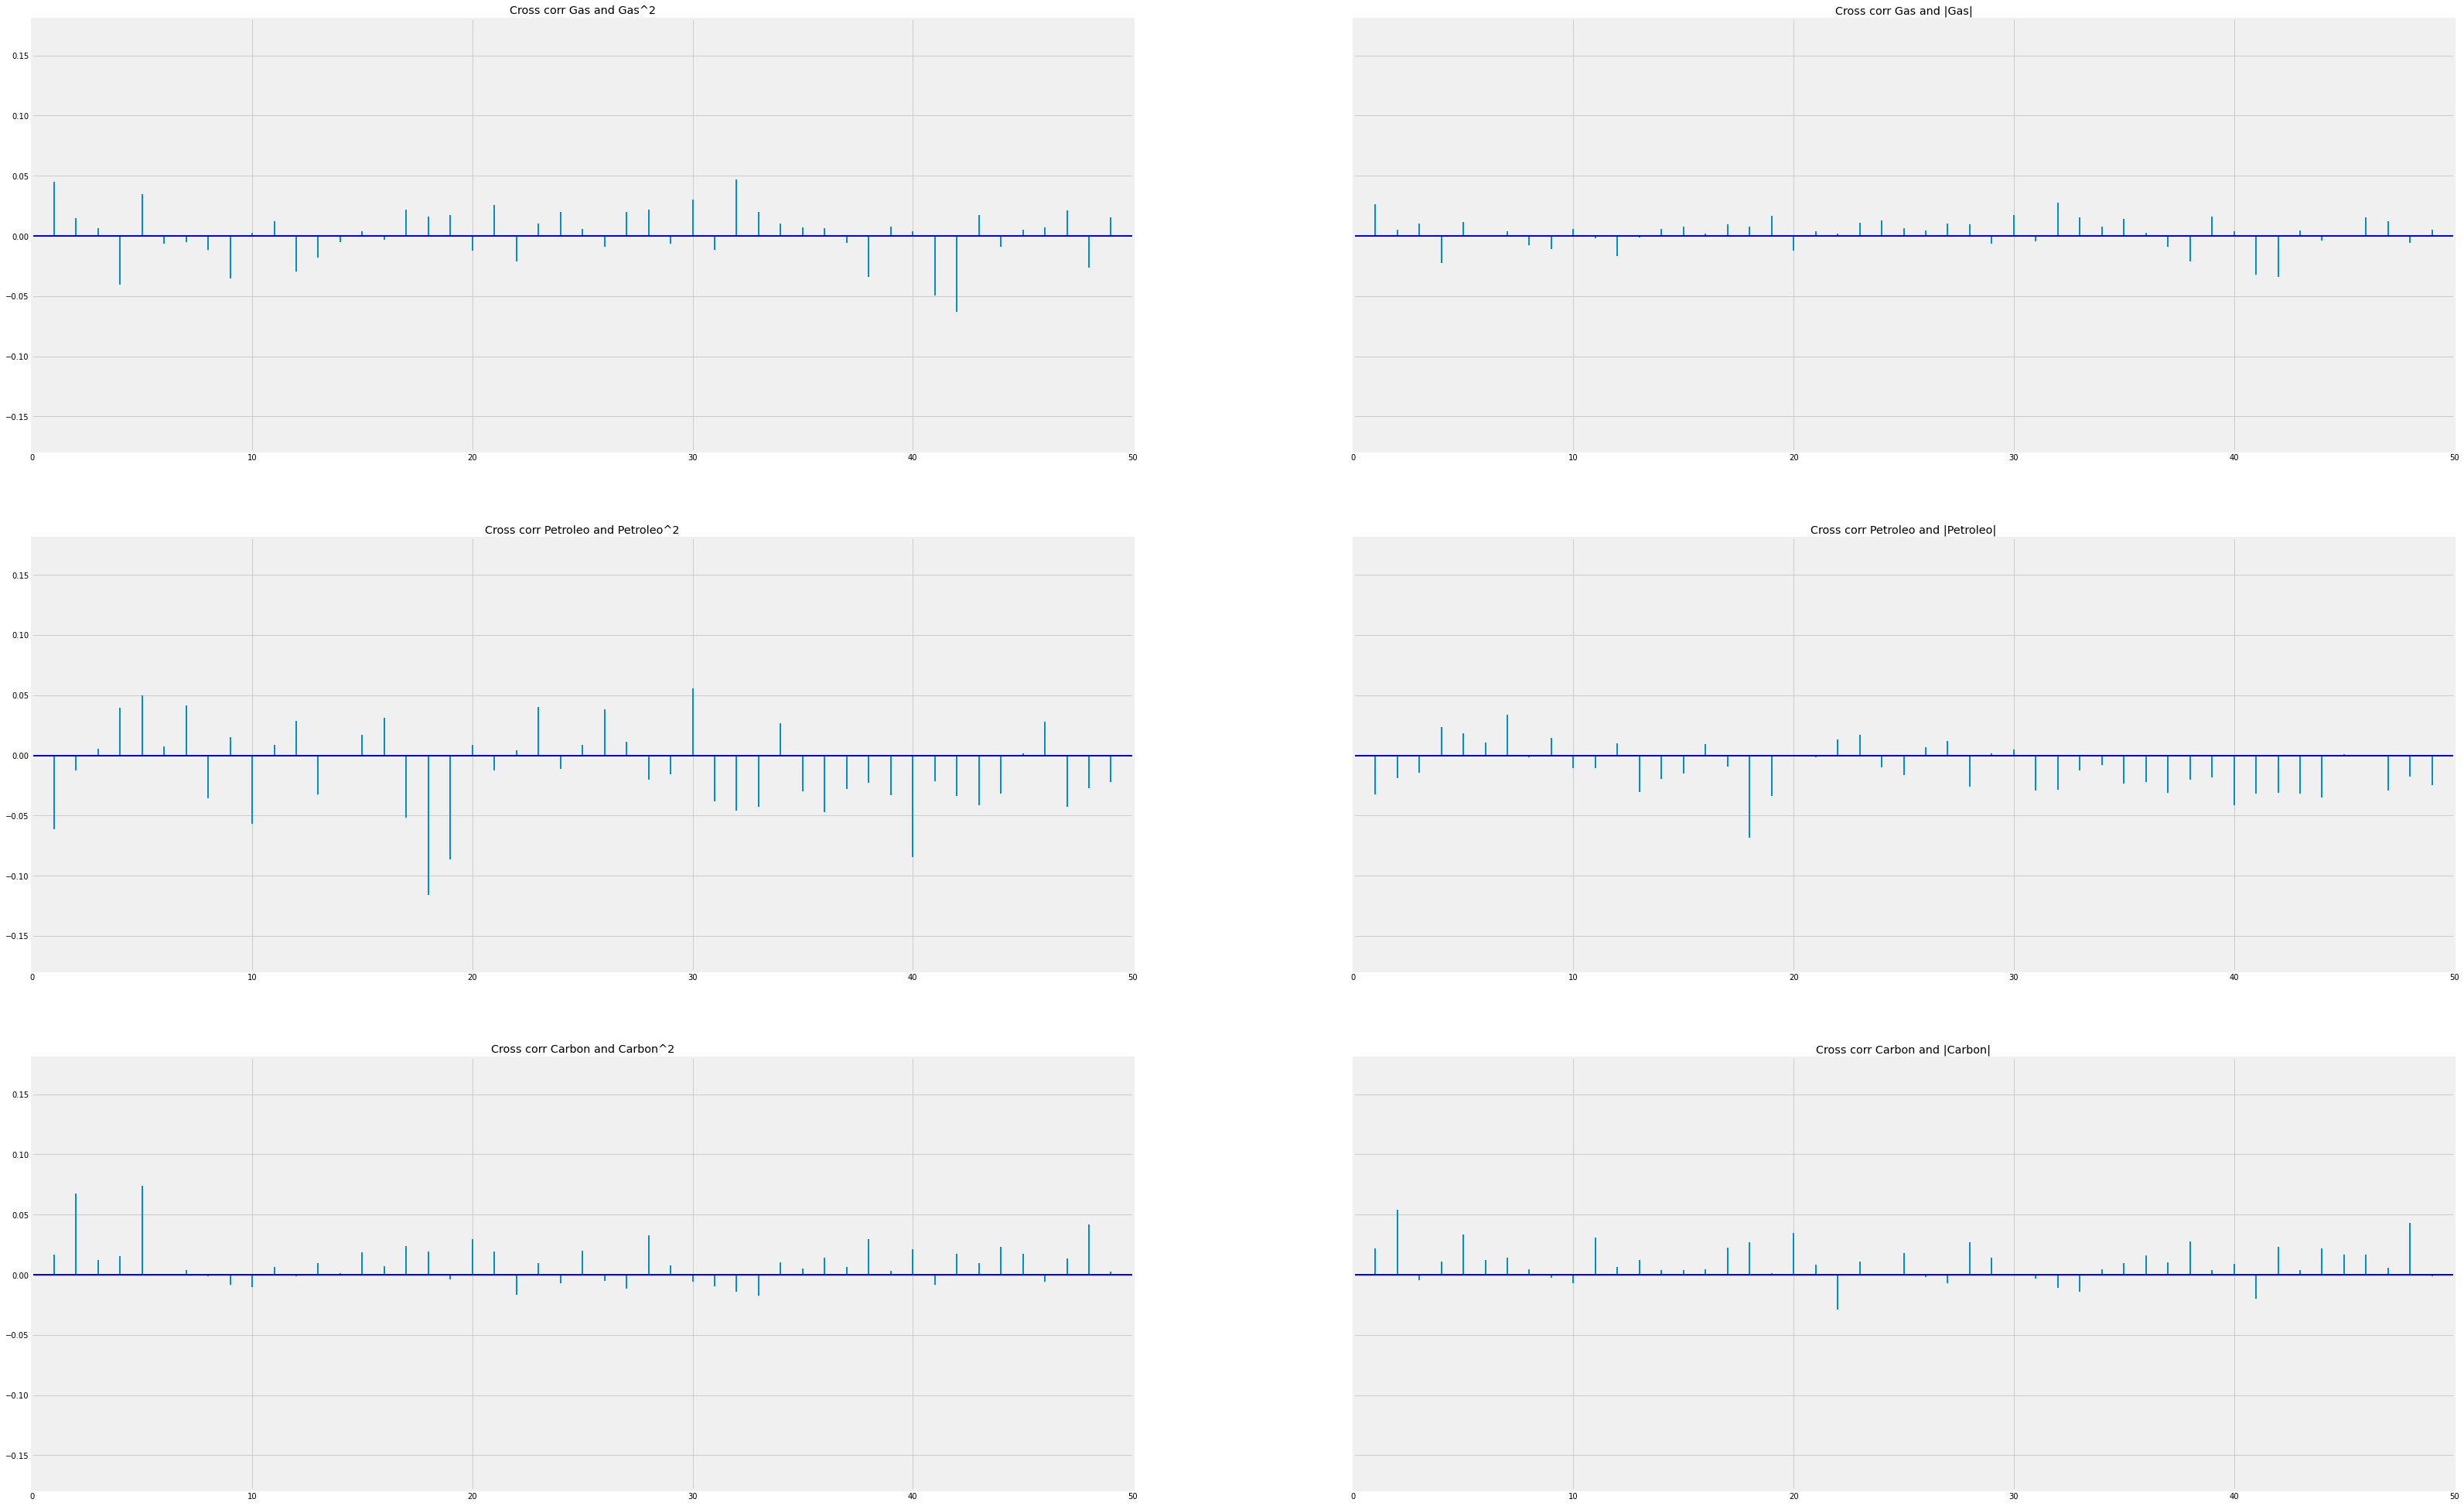

In [45]:
fig, ax = plt.subplots(figsize = (50, 35), nrows=3, ncols=2, sharey=True)

# GAS ########################################################
ax[0,0].xcorr(gas_return, np.square(gas_return), maxlags=50, normed=True, lw=2) 
ax[0,0].axhline(0, color='blue', lw=2) 
ax[0,0].set_title('Cross corr Gas and Gas^2')
ax[0,0].set_xlim([0,50])

ax[0,1].xcorr(gas_return, np.absolute(gas_return), maxlags=50, normed=True, lw=2) 
ax[0,1].axhline(0, color='blue', lw=2) 
ax[0,1].set_title('Cross corr Gas and |Gas|')
ax[0,1].set_xlim([0,50])
# PETROLEO ###################################################
ax[1,0].xcorr(petroleo_return, np.square(petroleo_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[1,0].axhline(0, color='blue', lw=2) 
ax[1,0].set_title('Cross corr Petroleo and Petroleo^2')
ax[1,0].set_xlim([0,50])

ax[1,1].xcorr(petroleo_return, np.absolute(petroleo_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[1,1].axhline(0, color='blue', lw=2) 
ax[1,1].set_title('Cross corr Petroleo and |Petroleo|')
ax[1,1].set_xlim([0,50])
# CARBON #####################################################
ax[2,0].xcorr(carbon_return, np.square(carbon_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[2,0].axhline(0, color='blue', lw=2)
ax[2,0].set_title('Cross corr Carbon and Carbon^2')
ax[2,0].set_xlim([0,50])

ax[2,1].xcorr(carbon_return, np.absolute(carbon_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[2,1].axhline(0, color='blue', lw=2)
ax[2,1].set_title('Cross corr Carbon and |Carbon|')
ax[2,1].set_xlim([0,50])

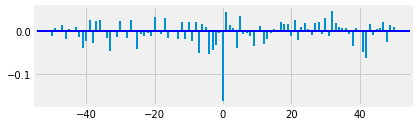

In [46]:
fig = plt.figure() 
ax1 = fig.add_subplot(211) 
  
ax1.xcorr(gas_return, np.square(gas_return), usevlines=True, maxlags=50, normed=True, lw=2) 
# ax1.grid(True) 
ax1.axhline(0, color='blue', lw=2) 
  
plt.show() 

## Robust Correlations

## 